In [1]:
import sys, os, os.path
if not 'EXPERIMENT_HOME' in os.environ: # Configure local paths if not already defined
    ML_HOME = os.path.abspath(os.path.join("/home/jovyan", "ml_home")) # ML workspace
    EXPERIMENT_HOME = os.path.abspath(os.path.join(ML_HOME, "..")) # Experiment workspace
    DATA_HOME = os.path.abspath(os.path.join(EXPERIMENT_HOME,"dataset")) # Dataset location
    os.environ["EXPERIMENT_HOME"] = EXPERIMENT_HOME
    os.environ["DATA_HOME"] = DATA_HOME
    sys.path.insert(0, EXPERIMENT_HOME)
    sys.path.insert(0, ML_HOME) # Add to path so can load our library
    os.chdir(EXPERIMENT_HOME) # Change working directory to experiment workspace
print("Experiment Home: ", os.path.abspath(os.curdir), "; Data Home:", DATA_HOME)

Experiment Home:  /home/jovyan ; Data Home: /home/jovyan/dataset


In [2]:
from datetime import datetime
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import xlrd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from preprocessing import add_feature_set_1
%matplotlib inline


# Load Data

In [3]:
os.chdir("/home/jovyan/dataset/set100.data")

In [4]:
df = pd.read_csv('_fs2.csv.gz') # Load FS02 dataset

In [5]:
df.tail()

,Unnamed: 0,key_0,Price,MV,VA,VO,DY,Date,Ticker,Sector,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
134994,134994,2019-12-24,13.4,5916.91,43853.1,3283.1,3.36,2019-12-24,WORK,Media & Publishing,...,-69.230803,-1.718824,13.970206,-4.285717,-17.993092,-18.920791,0.927698,-1.470594,-1.481514,-17.356904
134995,134995,2019-12-25,13.6,6005.22,25806.5,1918.2,3.31,2019-12-25,WORK,Media & Publishing,...,-53.846131,-1.580588,13.951800,-2.158268,-18.634808,-18.863594,0.228786,1.492543,1.481514,-16.123420
134996,134996,2019-12-26,13.9,6137.69,26514.5,1907.0,3.24,2019-12-26,WORK,Media & Publishing,...,-30.769270,-1.358235,13.949225,5.303029,-19.059525,-18.902780,-0.156744,2.205877,2.181899,-14.273206
134997,134997,2019-12-27,14.1,6226.00,22389.9,1587.2,3.19,2019-12-27,WORK,Media & Publishing,...,-15.384598,-1.135882,13.953622,7.633588,-20.348335,-19.191891,-1.156444,1.438854,1.428601,-13.039723
134998,134998,2019-12-30,14.0,6181.84,2242.3,159.0,3.21,2019-12-30,WORK,Media & Publishing,...,-23.076934,-0.852059,13.956885,4.477615,-26.593044,-20.672122,-5.920923,-0.709223,-0.711749,-13.656465


In [6]:
df.columns[11:]

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
     

In [7]:
df_features = df[df.columns[11:]]
df_features.head()

,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,4.36,4.24,4.36,4.30,18027300.0,3.756939,7.163384e+01,18027300.0,0.000004,0.000000e+00,...,-49.999801,0.0,4.300000,0.0,0.000000,0.000000,0.000000,-17.772648,0.000000,0.000000
1,4.40,4.30,4.34,4.36,19155200.0,3.809362,3.831112e+06,37182500.0,0.103035,1.149311e+06,...,-24.999925,0.0,4.328048,0.0,0.496801,0.099360,0.397441,1.395347,1.385702,1.395347
2,4.50,4.38,4.40,4.46,23555200.0,3.896733,1.168284e+07,60737700.0,0.192349,1.321626e+06,...,-15.384587,0.0,4.388618,0.0,2.757028,0.630894,2.126134,2.293576,2.267669,3.720927
3,4.50,4.42,4.46,4.50,15468400.0,3.931681,2.715124e+07,76206100.0,0.356287,1.221213e+06,...,-0.000000,0.0,4.438915,0.0,1.033141,0.711343,0.321798,0.896860,0.892862,4.651158
4,4.48,4.42,4.42,4.46,3958800.0,3.896733,2.847084e+07,72247300.0,0.355154,1.024132e+06,...,-15.384587,0.0,4.448140,0.0,-5.707498,-0.572425,-5.135073,-0.888888,-0.892862,3.720927


# Standardize

In [8]:
from sklearn.cluster import KMeans
import numpy as np

X = df_features

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [9]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [10]:
kmeans.cluster_centers_

array([[ 4.21828125e+01,  4.13078400e+01,  4.17529618e+01,
         4.17341248e+01,  1.17324072e+07,  3.70261524e+01,
        -1.20537462e+08,  1.94477206e+09, -3.30542484e-02,
         1.70062231e+05,  5.20269915e+01, -4.93674699e+00,
        -5.38461929e+00,  5.59274471e+04,  7.06537684e+02,
         4.17564083e+01,  9.24250620e-01,  4.17449052e+01,
         4.37567567e+01,  3.97330538e+01,  1.14773781e+01,
         4.93211561e-01,  6.19930520e-02,  6.11187010e-02,
         4.17459531e+01,  4.26217336e+01,  4.08701727e+01,
         4.96500864e+00,  4.80496907e-01,  1.71560170e-01,
         1.81459073e-01,  3.95740204e+01,  4.39284957e+01,
         4.17512581e+01,  1.24496783e+01,  4.84380422e-01,
         4.35653003e+00, -7.78452378e-03, -7.50580869e-03,
        -2.78715087e-04,  4.17396295e+01,  4.17495374e+01,
         4.17398225e+01,  4.17476070e+01,  2.54487265e+01,
         2.08360269e+01,  2.09997269e+01,  9.65080400e-01,
         9.72494998e-01, -7.41459766e-03, -5.85314308e-0

# Elbow method in sklearn

https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method

In [3]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

def find_elbow(X):
    distorsions = []
    for k in range(2, 20):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        distorsions.append(kmeans.inertia_)

    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(2, 20), distorsions)
    plt.grid(True)
    plt.title('Elbow curve')

find_elbow(X)

NameError: name 'X_scaled_sd' is not defined

# Silhouette Analysis

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#

Text(0, 0.5, 'Feature space for the 2nd feature')

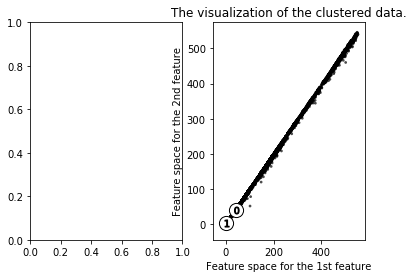

In [16]:
import matplotlib.cm as cm
X = X.values

fig, (ax1, ax2) = plt.subplots(1, 2)
n_clusters=2
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

In [18]:
df_features[['volume']]

,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,4.36,4.24,4.36,4.30,18027300.0,3.756939,7.163384e+01,18027300.0,0.000004,0.000000e+00,...,-49.999801,0.000000,4.300000,0.000000,0.000000,0.000000,0.000000,-17.772648,0.000000,0.000000
1,4.40,4.30,4.34,4.36,19155200.0,3.809362,3.831112e+06,37182500.0,0.103035,1.149311e+06,...,-24.999925,0.000000,4.328048,0.000000,0.496801,0.099360,0.397441,1.395347,1.385702,1.395347
2,4.50,4.38,4.40,4.46,23555200.0,3.896733,1.168284e+07,60737700.0,0.192349,1.321626e+06,...,-15.384587,0.000000,4.388618,0.000000,2.757028,0.630894,2.126134,2.293576,2.267669,3.720927
3,4.50,4.42,4.46,4.50,15468400.0,3.931681,2.715124e+07,76206100.0,0.356287,1.221213e+06,...,-0.000000,0.000000,4.438915,0.000000,1.033141,0.711343,0.321798,0.896860,0.892862,4.651158
4,4.48,4.42,4.42,4.46,3958800.0,3.896733,2.847084e+07,72247300.0,0.355154,1.024132e+06,...,-15.384587,0.000000,4.448140,0.000000,-5.707498,-0.572425,-5.135073,-0.888888,-0.892862,3.720927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134994,13.70,13.00,13.60,13.40,3282900.0,12.420717,-3.075054e+08,321970740.0,-0.233791,-2.514752e+05,...,-69.230803,-1.718824,13.970206,-4.285717,-17.993092,-18.920791,0.927698,-1.470594,-1.481514,-17.356904
134995,13.80,13.10,13.30,13.60,1918100.0,12.606101,-3.066834e+08,323888840.0,-0.181990,-1.607471e+05,...,-53.846131,-1.580588,13.951800,-2.158268,-18.634808,-18.863594,0.228786,1.492543,1.481514,-16.123420
134996,14.10,13.60,13.60,13.90,1906900.0,12.884177,-3.063020e+08,325795740.0,-0.172672,-5.605912e+04,...,-30.769270,-1.358235,13.949225,5.303029,-19.059525,-18.902780,-0.156744,2.205877,2.181899,-14.273206
134997,14.30,13.90,14.00,14.10,1587200.0,13.069561,-3.063020e+08,327382940.0,-0.130309,-2.701930e+03,...,-15.384598,-1.135882,13.953622,7.633588,-20.348335,-19.191891,-1.156444,1.438854,1.428601,-13.039723


# Preprocess with PCA

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
sc = MinMaxScaler()
df_scaled = sc.fit_transform(df_features)

pca = PCA(n_components=2) # Get two components that explain the most
pca.fit(X)

PCA(n_components=2)

In [43]:
# Components 
print(pca.components_)

[[-2.10839746e-09 -2.06616901e-09 -2.08762632e-09 -2.08692881e-09
   3.19108234e-03 -1.84623768e-09 -5.40678612e-02  9.98532164e-01
  -2.48498280e-12 -4.86783287e-06  5.34782296e-12  4.80441471e-10
   5.15562041e-10  6.27180829e-06 -2.98020650e-09 -2.08839176e-09
  -4.47865882e-11 -2.08847066e-09 -2.18682806e-09 -1.99011325e-09
  -3.21140789e-11 -7.14711653e-13  1.92325315e-14  1.98782951e-13
  -2.08785014e-09 -2.13012081e-09 -2.04557947e-09 -5.24361606e-12
  -9.45529675e-13 -8.32932384e-13  5.75063414e-14 -1.98280356e-09
  -2.19541446e-09 -2.08910901e-09 -3.61327678e-11 -1.10406570e-12
  -7.82826207e-12  1.20689646e-12  1.21675620e-12 -9.85973862e-15
  -2.08777550e-09 -2.08906163e-09 -2.08779281e-09 -2.08899971e-09
   2.14388788e-11 -6.12963389e-11 -4.18101407e-11  2.21746479e-13
   7.07634930e-13 -4.85888451e-13 -8.55328442e-13  2.19367545e-12
  -2.16838220e-10 -3.34954283e-13 -2.29711573e-10 -2.23393141e-10
  -6.31843204e-12 -2.08805192e-09 -2.09007040e-09 -2.08906116e-09
  -2.09389

In [44]:
print(pca.explained_variance_)

[4.14034399e+19 1.16054307e+18]


In [45]:
X_pca = pca.transform(X)
print("original shape:   ", df_scaled.shape)
print("transformed shape:", X_pca.shape)

original shape:    (134999, 89)
transformed shape: (134999, 2)


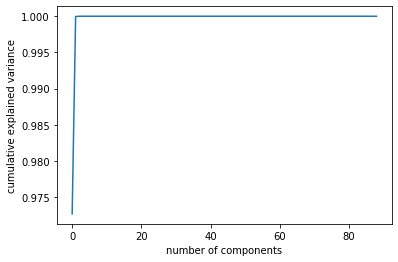

In [46]:
pca2 = PCA().fit(X)
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Text(0, 0.5, 'Feature space for the 2nd feature')

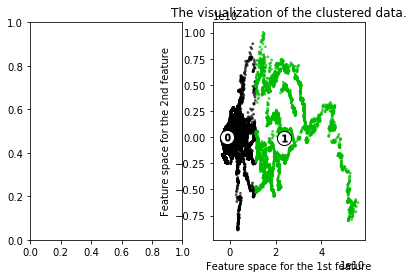

In [48]:

X = X_pca

fig, (ax1, ax2) = plt.subplots(1, 2)
n_clusters=2
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

# PCA threshold=0.9

In [68]:
pca3 = PCA(n_components=0.9, svd_solver='full')

pca3 = pca3.fit(df_scaled)
X_pca3 = pca3.transform(df_features)

In [69]:
X_pca3.shape

(134999, 11)

In [70]:
print(pca3.explained_variance_)

[0.92957267 0.42542324 0.27616535 0.14840174 0.12212105 0.05850185
 0.05200054 0.04516561 0.03783892 0.03694799 0.03565851]


In [71]:
pca3.components_

array([[ 4.73233949e-03,  4.69448819e-03,  4.56150584e-03,
         4.88637364e-03,  1.43787969e-03,  4.88765469e-03,
         3.05800373e-03, -1.97375936e-03,  5.33497140e-02,
         2.01178578e-03,  1.54927397e-01,  1.74176825e-04,
         9.94354016e-04,  5.55382466e-04,  1.00223654e-02,
         3.01158999e-03,  2.83813165e-03,  2.43411673e-03,
         2.47907725e-03,  2.34718530e-03,  8.47669505e-04,
         1.48259814e-01,  1.04783752e-01, -1.02818425e-01,
         3.25122483e-03,  3.28523785e-03,  3.19860465e-03,
         3.26803491e-03,  2.28259627e-02,  2.43777696e-01,
        -2.54075943e-01,  2.53590106e-03,  2.67475857e-03,
         2.61168296e-03,  1.18046044e-03,  2.79723271e-01,
        -2.90987021e-02,  1.14407005e-02,  7.26920012e-03,
         1.60757743e-02,  3.07676405e-03,  2.20455656e-03,
         3.36046532e-03,  2.64623216e-03,  3.28324449e-03,
         6.35521133e-02, -8.19498992e-02,  7.41692440e-02,
        -3.35039515e-02,  6.35669858e-02,  5.96383216e-0

In [90]:
cols = ['pc%s' % i for i in range(1,len(pca3.explained_variance_)+1)]
pca3_df = pd.DataFrame(data = X_pca3, columns = cols)
pca3_df['sector'] = df['Sector']
pca3_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,sector
0,-1.135174e+04,-7.095362e+05,-59925.544834,98398.265382,2.272851e+04,-1.777098e+05,60623.453342,97912.153066,-2.566782e+04,3.212256e+05,177772.056303,Transportation & Logistics
1,-3.337386e+04,-1.353398e+06,-105306.134374,59747.774419,5.649260e+04,-3.029341e+05,74089.282691,170370.197575,-1.519866e+04,6.088061e+05,233132.508162,Transportation & Logistics
2,-4.709082e+04,-2.132354e+06,-178330.610491,35270.137414,1.365410e+05,-3.892887e+05,101781.235222,282261.350287,4.556316e+04,9.524890e+05,322195.759371,Transportation & Logistics
3,-4.220536e+04,-2.510283e+06,-247960.051081,-72853.412877,2.635394e+05,-2.335333e+05,93794.301350,375745.489854,2.358448e+05,1.106056e+06,295890.292946,Transportation & Logistics
4,-4.763450e+04,-2.310315e+06,-225989.451068,-154992.728707,2.552332e+05,-1.717931e+05,58899.043876,341876.964951,2.553297e+05,1.014681e+06,201250.935504,Transportation & Logistics
...,...,...,...,...,...,...,...,...,...,...,...,...
134994,-1.571652e+06,-1.382390e+07,799162.554991,-602988.724026,-3.045172e+06,-1.003708e+07,-50802.361770,-463560.089533,-5.581126e+06,6.662023e+06,997165.165689,Media & Publishing
134995,-1.574661e+06,-1.387827e+07,795644.241588,-618723.895480,-3.040312e+06,-1.004152e+07,-53561.636685,-458037.489262,-5.574855e+06,6.685826e+06,991741.384843,Media & Publishing
134996,-1.576985e+06,-1.394183e+07,791361.759835,-623526.988574,-3.037088e+06,-1.005412e+07,-52580.344671,-451137.681158,-5.574013e+06,6.714216e+06,996357.993533,Media & Publishing
134997,-1.580457e+06,-1.399598e+07,789704.672255,-629853.741837,-3.038168e+06,-1.007157e+07,-52892.356739,-447531.666998,-5.578452e+06,6.738850e+06,998095.132959,Media & Publishing


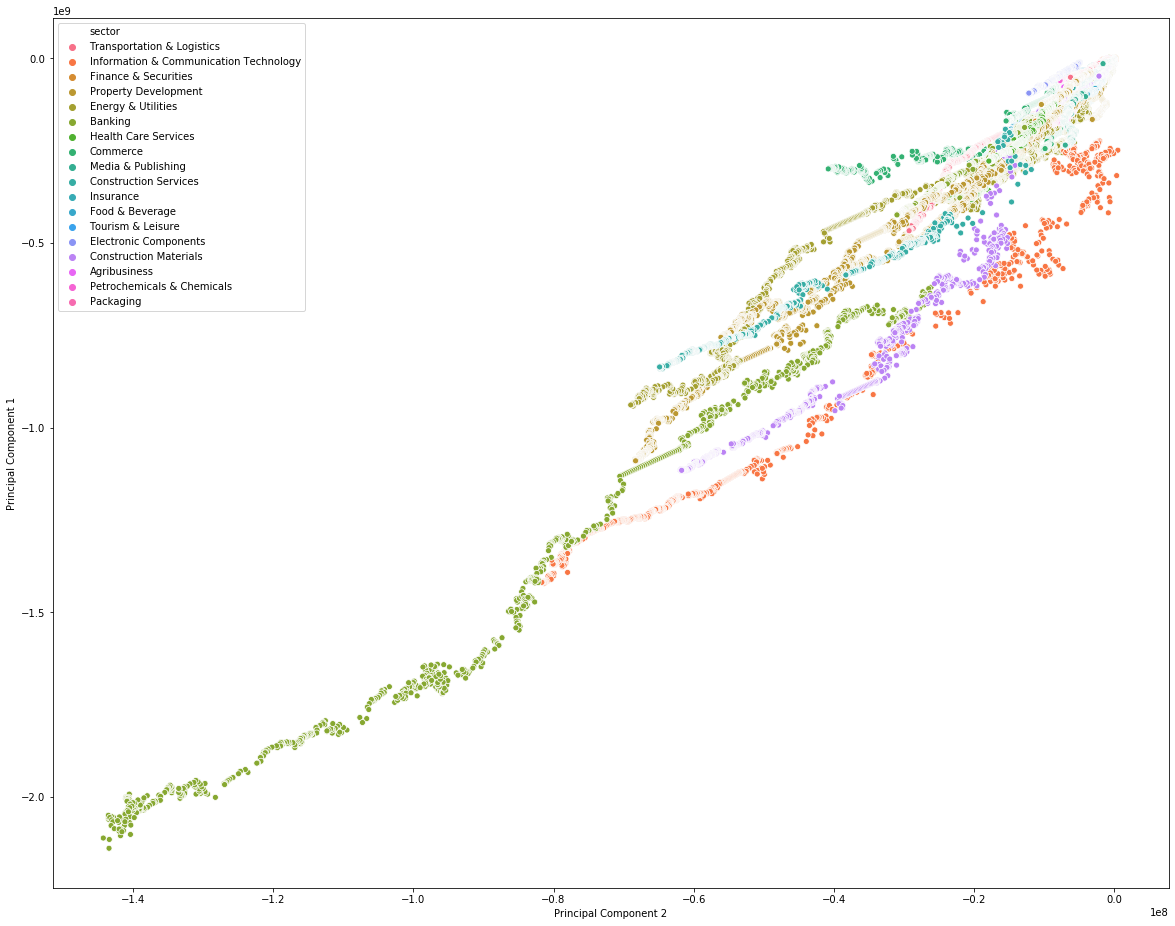

In [94]:

fig = plt.figure(figsize=(20, 16))
sns.scatterplot(pca3_df.pc1, pca3_df.pc2, hue = pca3_df.sector)
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.show()